In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
torch.set_printoptions(edgeitems=2, linewidth=75)

# **Problem 1a: Housing dataset, 1 hidden layer**

In [6]:
def training_loop_val(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []
    for epoch in range(1, n_epochs + 1):
        train_y_pred = model(X_train)
        train_loss = loss_fn(train_y_pred, y_train)
        train_losses.append(torch.sqrt(train_loss).item())

        val_y_pred = model(X_val)
        val_loss = loss_fn(val_y_pred, y_val)
        val_losses.append(torch.sqrt(val_loss).item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, \tTrain RMSE {torch.sqrt(train_loss):.1f}, \tVal RMSE {torch.sqrt(val_loss):.1f}')

    return train_losses, val_losses

file_path = r'/home/charlie51135/ml/Housing.csv'
housing = pd.read_csv(file_path)
# Check for null values
#housing.isnull().sum()*100/housing.shape[0]

# Replace yes/no data
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Split training and test data
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
y = housing.pop('price')
X = housing[input_vars]

# Apply standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_std, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split training and test data
torch.manual_seed(123)
n_samples = X_tensor.shape[0]
n_val = int(n_samples * 0.2)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

X_train = X_tensor[train_indices]
y_train = y_tensor[train_indices]

X_val = X_tensor[val_indices]
y_val = y_tensor[val_indices]


Learning rate = 0.01

Epoch 500, 	Train RMSE 1322396.2, 	Val RMSE 1156664.8
Epoch 1000, 	Train RMSE 1315212.9, 	Val RMSE 1148563.6
Epoch 1500, 	Train RMSE 1312244.4, 	Val RMSE 1143950.4
Epoch 2000, 	Train RMSE 1310345.6, 	Val RMSE 1140932.6
Epoch 2500, 	Train RMSE 1308957.5, 	Val RMSE 1138946.2
Epoch 3000, 	Train RMSE 1307890.5, 	Val RMSE 1137644.5
Epoch 3500, 	Train RMSE 1307046.1, 	Val RMSE 1136804.4
Epoch 4000, 	Train RMSE 1306362.1, 	Val RMSE 1136280.5
Epoch 4500, 	Train RMSE 1305797.2, 	Val RMSE 1135976.5
Epoch 5000, 	Train RMSE 1305322.1, 	Val RMSE 1135827.4


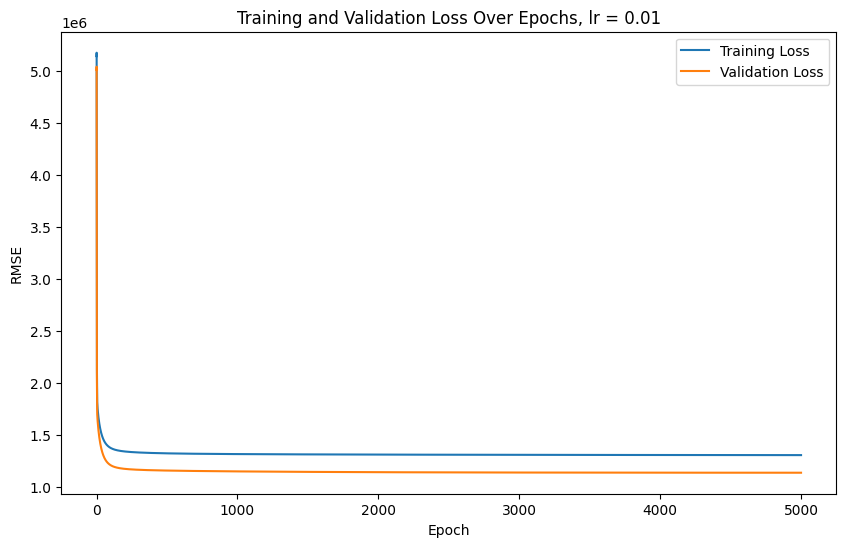


Learning rate = 0.001

Epoch 500, 	Train RMSE 1390815.9, 	Val RMSE 1293512.4
Epoch 1000, 	Train RMSE 1296294.5, 	Val RMSE 1217194.1
Epoch 1500, 	Train RMSE 1259148.2, 	Val RMSE 1195817.1
Epoch 2000, 	Train RMSE 1242666.2, 	Val RMSE 1191164.0
Epoch 2500, 	Train RMSE 1234561.9, 	Val RMSE 1191557.9
Epoch 3000, 	Train RMSE 1230168.8, 	Val RMSE 1193264.6
Epoch 3500, 	Train RMSE 1227561.6, 	Val RMSE 1195108.4
Epoch 4000, 	Train RMSE 1225886.2, 	Val RMSE 1196756.0
Epoch 4500, 	Train RMSE 1224735.4, 	Val RMSE 1198147.1
Epoch 5000, 	Train RMSE 1223901.4, 	Val RMSE 1199302.6


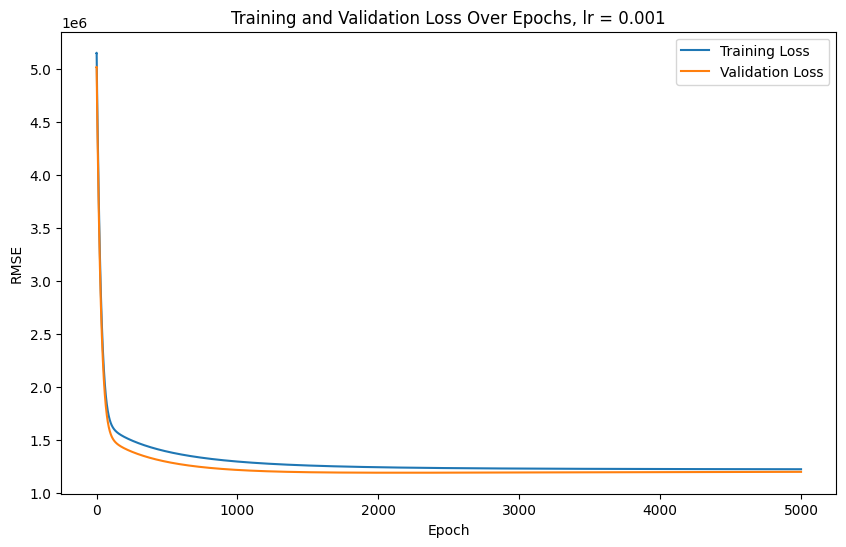


Learning rate = 0.0001

Epoch 500, 	Train RMSE 3744364.0, 	Val RMSE 3658456.5
Epoch 1000, 	Train RMSE 2947877.5, 	Val RMSE 2904525.2
Epoch 1500, 	Train RMSE 2491054.0, 	Val RMSE 2473262.2
Epoch 2000, 	Train RMSE 2222100.0, 	Val RMSE 2216172.2
Epoch 2500, 	Train RMSE 2054602.8, 	Val RMSE 2052762.6
Epoch 3000, 	Train RMSE 1941813.1, 	Val RMSE 1940522.8
Epoch 3500, 	Train RMSE 1859577.5, 	Val RMSE 1857584.1
Epoch 4000, 	Train RMSE 1795541.8, 	Val RMSE 1792646.2
Epoch 4500, 	Train RMSE 1743218.2, 	Val RMSE 1739646.9
Epoch 5000, 	Train RMSE 1699009.5, 	Val RMSE 1695126.5


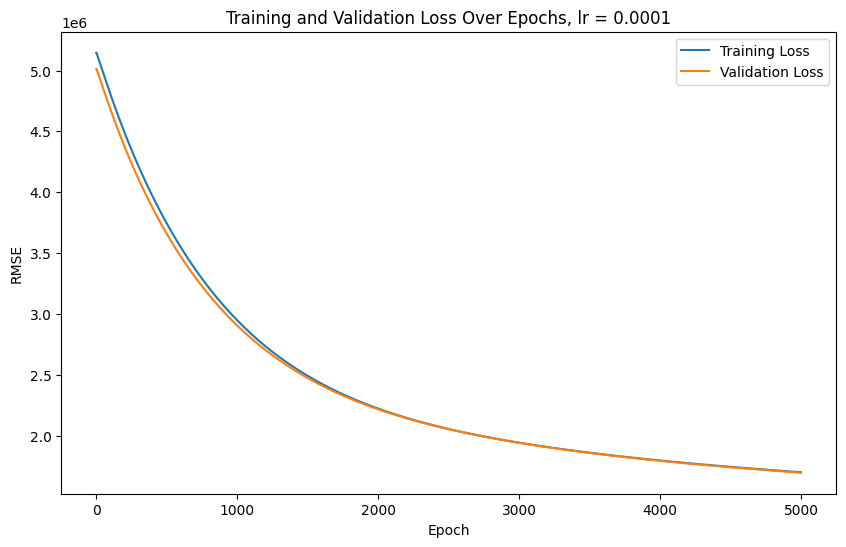

In [10]:
for learning_rate in [0.01, 0.001, 0.0001]:
    torch.manual_seed(123)
    print(f'\nLearning rate = {learning_rate}\n')

    seq_model = nn.Sequential(
                nn.Linear(11, 32),
                nn.Tanh(),
                nn.Linear(32, 1))
    optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

    train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        model = seq_model,
        loss_fn = nn.MSELoss(),
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    # print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 1b: Housing dataset, three hidden layers**


Learning rate = 0.01

Epoch 500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 1000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 1500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 2000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 2500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 3000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 3500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 4000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 4500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9
Epoch 5000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.9


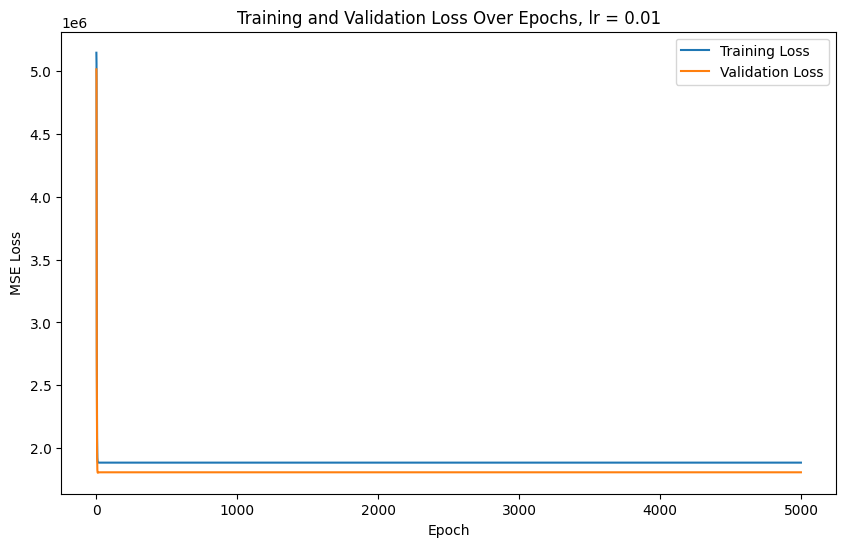


Learning rate = 0.001

Epoch 500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 1000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 1500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 2000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 2500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 3000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 3500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 4000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 4500, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4
Epoch 5000, 	Train RMSE 1883979.0, 	Val RMSE 1807084.4


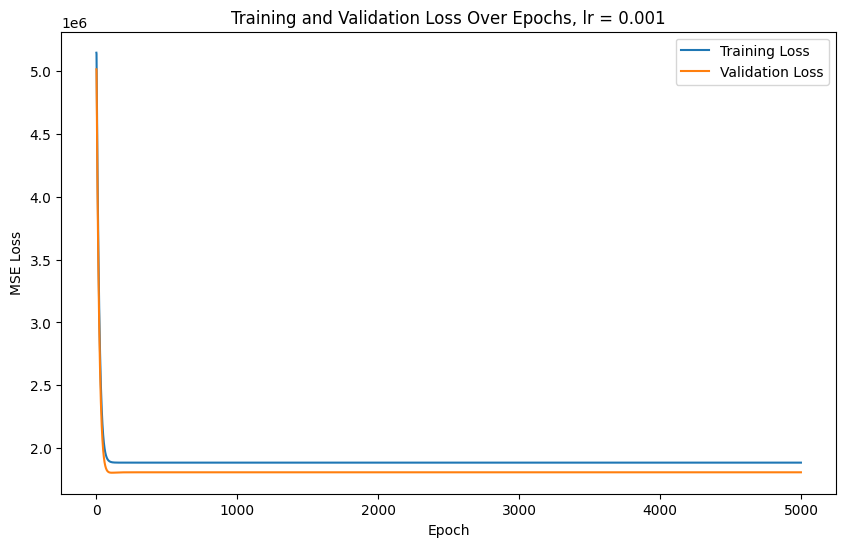


Learning rate = 0.0001

Epoch 500, 	Train RMSE 2078564.9, 	Val RMSE 1960285.0
Epoch 1000, 	Train RMSE 1890756.8, 	Val RMSE 1804389.4
Epoch 1500, 	Train RMSE 1884204.2, 	Val RMSE 1805539.0
Epoch 2000, 	Train RMSE 1883986.4, 	Val RMSE 1806768.4
Epoch 2500, 	Train RMSE 1883979.2, 	Val RMSE 1807025.9
Epoch 3000, 	Train RMSE 1883979.0, 	Val RMSE 1807073.4
Epoch 3500, 	Train RMSE 1883979.0, 	Val RMSE 1807080.1
Epoch 4000, 	Train RMSE 1883979.0, 	Val RMSE 1807080.1
Epoch 4500, 	Train RMSE 1883979.0, 	Val RMSE 1807080.1
Epoch 5000, 	Train RMSE 1883979.0, 	Val RMSE 1807080.1


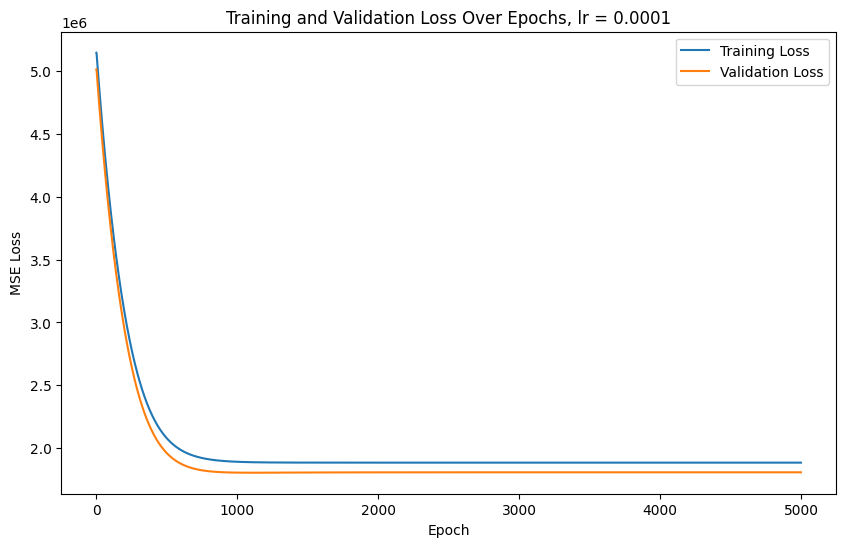

In [11]:
for learning_rate in [0.01, 0.001, 0.0001]:
    torch.manual_seed(123)
    print(f'\nLearning rate = {learning_rate}\n')

    seq_model = nn.Sequential(
                nn.Linear(11, 32),
                nn.Tanh(),
                nn.Linear(32, 64),
                nn.Tanh(),
                nn.Linear(64, 16),
                nn.Tanh(),
                nn.Linear(16, 1))
    optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

    train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        model = seq_model,
        loss_fn = nn.MSELoss(),
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    # print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 2a: 10 classes in CIFAR-10, SGD, one hidden layer**

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch.manual_seed(123)

cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.ToTensor())

imgs = torch.stack([img for img, _ in cifar10], dim=3)
print(imgs.shape)
print(imgs.view(3, -1).mean(dim=1))
print(imgs.view(3, -1).std(dim=1))

cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))
cifar10_val = datasets.CIFAR10('data', train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

def validate(model, train_loader, val_loader):
    accuracy = {"train": 0, "val": 0}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
                outputs = model(imgs.view(imgs.shape[0], -1))
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        accuracy[name] = correct / total
    return accuracy

cuda
Files already downloaded and verified
torch.Size([3, 32, 32, 50000])
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])
Files already downloaded and verified
Files already downloaded and verified


In [21]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim=1)
          ).to(device, non_blocking=True) 

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=1024, shuffle=True, pin_memory=True, num_workers=8)
train_loader_acc = torch.utils.data.DataLoader(cifar10, batch_size=1024, shuffle=False, pin_memory=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=1024, shuffle=False, pin_memory=True, num_workers=8)

for epoch in range(1, n_epochs + 1):
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        accuracy = validate(model, train_loader_acc, val_loader)
        print(f"Epoch: {epoch}, Training Loss: {loss:.6f}, "
            f"Training Accuracy: {accuracy['train']:.4f}, "
            f"Validation Accuracy: {accuracy['val']:.4f}")

Epoch: 5, Training Loss: 1.833246, Training Accuracy: 0.3896, Validation Accuracy: 0.3817
Epoch: 10, Training Loss: 1.748946, Training Accuracy: 0.4087, Validation Accuracy: 0.4007
Epoch: 15, Training Loss: 1.695934, Training Accuracy: 0.4221, Validation Accuracy: 0.4128
Epoch: 20, Training Loss: 1.746464, Training Accuracy: 0.4320, Validation Accuracy: 0.4190
Epoch: 25, Training Loss: 1.617837, Training Accuracy: 0.4404, Validation Accuracy: 0.4254
Epoch: 30, Training Loss: 1.655623, Training Accuracy: 0.4474, Validation Accuracy: 0.4311
Epoch: 35, Training Loss: 1.654728, Training Accuracy: 0.4548, Validation Accuracy: 0.4342
Epoch: 40, Training Loss: 1.587911, Training Accuracy: 0.4608, Validation Accuracy: 0.4380
Epoch: 45, Training Loss: 1.600038, Training Accuracy: 0.4687, Validation Accuracy: 0.4426
Epoch: 50, Training Loss: 1.538462, Training Accuracy: 0.4740, Validation Accuracy: 0.4454
Epoch: 55, Training Loss: 1.556682, Training Accuracy: 0.4807, Validation Accuracy: 0.4482


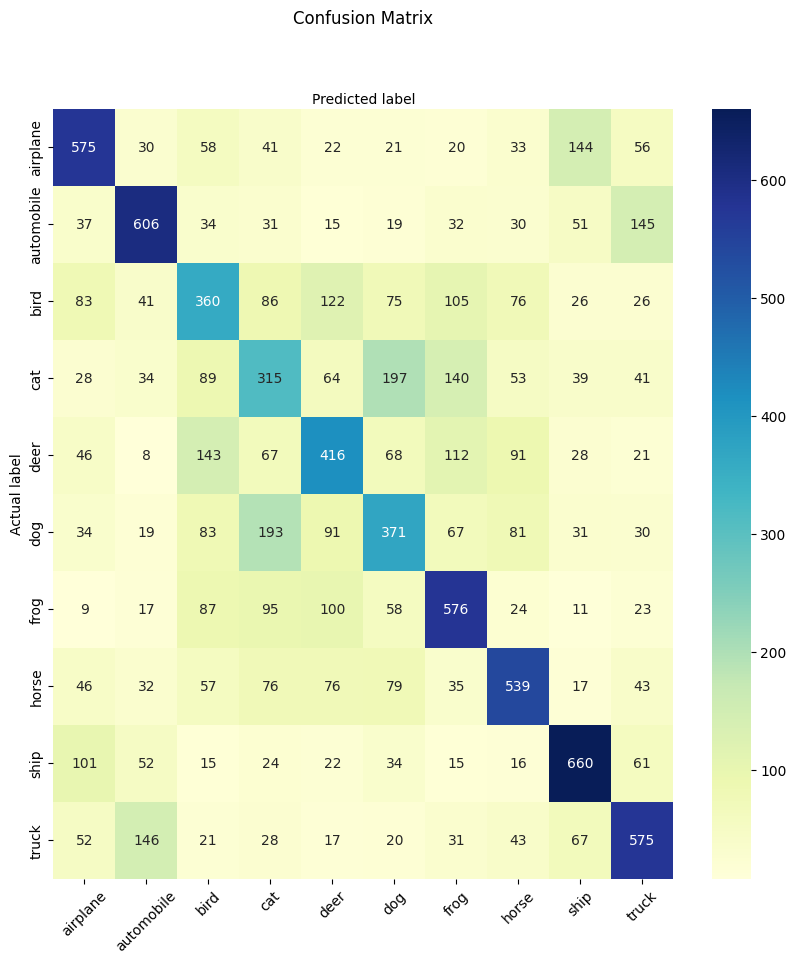

In [22]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(imgs.view(imgs.shape[0], -1))

        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.view(-1).cpu().numpy())
        all_labels.extend(labels.view(-1).cpu().numpy())

conf_mat = confusion_matrix(all_labels, all_preds)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='d',
            xticklabels=cifar10.classes,
            yticklabels=cifar10.classes)
ax.xaxis.set_label_position("top")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', y=1.1)
plt.show()

# **Problem 2b: 10 classes in CIFAR-10, SGD, three hidden layers**

In [25]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.Tanh(),
            nn.Linear(1024, 256),
            nn.Tanh(),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
          ).to(device, non_blocking=True) 

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=1024, shuffle=True, pin_memory=True, num_workers=8)
train_loader_acc = torch.utils.data.DataLoader(cifar10, batch_size=1024, shuffle=False, pin_memory=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=1024, shuffle=False, pin_memory=True, num_workers=8)

for epoch in range(1, n_epochs + 1):
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        accuracy = validate(model, train_loader_acc, val_loader)
        print(f"Epoch: {epoch}, Training Loss: {loss:.6f}, "
            f"Training Accuracy: {accuracy['train']:.4f}, "
            f"Validation Accuracy: {accuracy['val']:.4f}")

Epoch: 5, Training Loss: 1.954615, Training Accuracy: 0.3316, Validation Accuracy: 0.3339
Epoch: 10, Training Loss: 1.829974, Training Accuracy: 0.3657, Validation Accuracy: 0.3617
Epoch: 15, Training Loss: 1.765937, Training Accuracy: 0.3852, Validation Accuracy: 0.3813
Epoch: 20, Training Loss: 1.690721, Training Accuracy: 0.3967, Validation Accuracy: 0.3956
Epoch: 25, Training Loss: 1.726288, Training Accuracy: 0.4092, Validation Accuracy: 0.4045
Epoch: 30, Training Loss: 1.673214, Training Accuracy: 0.4183, Validation Accuracy: 0.4102
Epoch: 35, Training Loss: 1.693451, Training Accuracy: 0.4272, Validation Accuracy: 0.4165
Epoch: 40, Training Loss: 1.644606, Training Accuracy: 0.4346, Validation Accuracy: 0.4233
Epoch: 45, Training Loss: 1.688430, Training Accuracy: 0.4401, Validation Accuracy: 0.4307
Epoch: 50, Training Loss: 1.605096, Training Accuracy: 0.4465, Validation Accuracy: 0.4344
Epoch: 55, Training Loss: 1.593124, Training Accuracy: 0.4554, Validation Accuracy: 0.4363


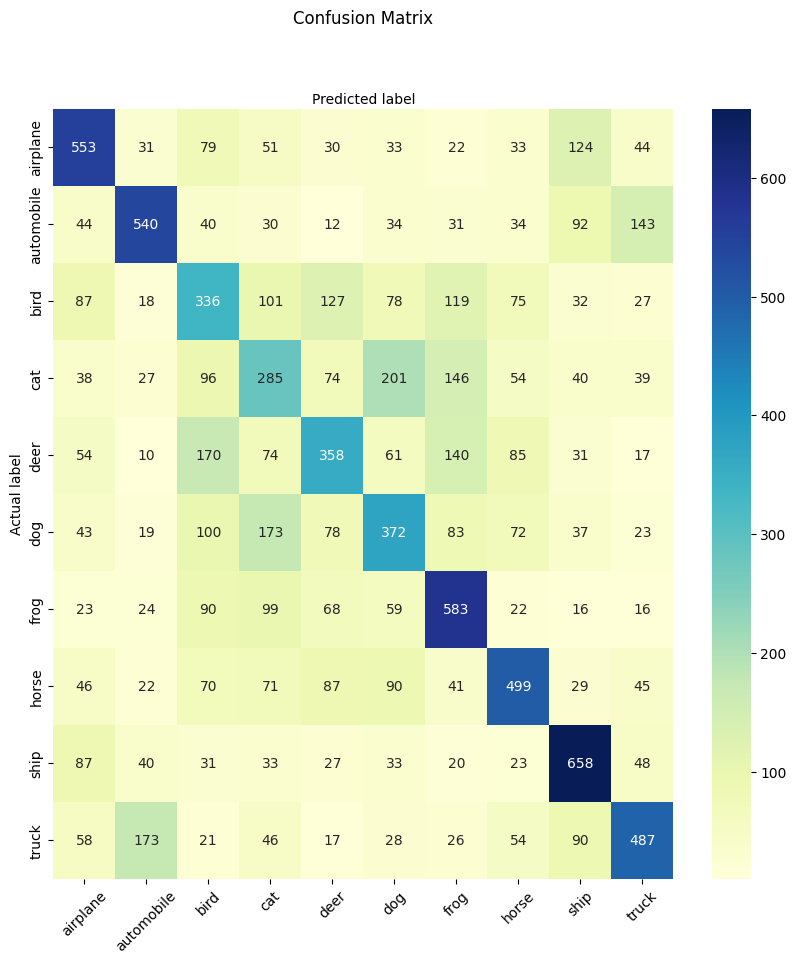

In [26]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(imgs.view(imgs.shape[0], -1))

        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.view(-1).cpu().numpy())
        all_labels.extend(labels.view(-1).cpu().numpy())

conf_mat = confusion_matrix(all_labels, all_preds)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='d',
            xticklabels=cifar10.classes,
            yticklabels=cifar10.classes)
ax.xaxis.set_label_position("top")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', y=1.1)
plt.show()